In [ ]:
import math
import pandas as pd

dataset = [
    ['<=30', 'high', 'no', 'fair', 'no'],
    ['<=30', 'high', 'no', 'excellent', 'no'],
    ['31-40', 'high', 'no', 'fair', 'yes'],
    ['>40', 'medium', 'no', 'fair', 'yes'],
    ['>40', 'low', 'yes', 'fair', 'yes'],
    ['>40', 'low', 'yes', 'excellent', 'no'],
    ['31-40', 'low', 'yes', 'excellent', 'yes'],
    ['<=30', 'medium', 'no', 'fair', 'no'],
    ['<=30', 'low', 'yes', 'fair', 'yes'],
    ['>40', 'medium', 'yes', 'fair', 'yes'],
    ['<=30', 'medium', 'yes', 'excellent', 'yes'],
    ['31-40', 'medium', 'no', 'excellent', 'yes'],
    ['31-40', 'high', 'yes', 'fair', 'yes'],
    ['>40', 'medium', 'no', 'excellent', 'no']
]

attributes = ['age', 'income', 'student', 'credit_rating', 'buys_computer']

In [ ]:
# PROBLEM 1
def entropy(dataset):
    yes = 0
    no = 0
    for row in dataset:
        if row[-1] == 'yes':
            yes += 1
        else:
            no += 1
    total = yes + no
    if yes == 0 or no == 0:
        return 0
    return - (yes/total)*math.log2(yes/total) - (no/total)*math.log2(no/total)

def information_gain(dataset, attr_index):
    total_entropy = entropy(dataset)
    values = set(row[attr_index] for row in dataset)
    weighted_entropy = 0
    for v in values:
        subset = []
        for row in dataset:
            if row[attr_index] == v:
                subset.append(row)
        weighted_entropy += (len(subset)/len(dataset)) * entropy(subset)
    return total_entropy - weighted_entropy

In [ ]:
attributes = ['Age', 'Income', 'Student', 'Credit']

for i in range(4):
    ig = information_gain(dataset, i)
    print(attributes[i], "Information Gain:", round(ig, 4))

Age Information Gain: 0.2467
Income Information Gain: 0.0292
Student Information Gain: 0.1518
Credit Information Gain: 0.0481


In [ ]:
def build_tree(dataset, attributes, depth=0):
    labels = [row[-1] for row in dataset]

    # ALL Yes or all No
    if labels.count(labels[0]) == len(labels):
        return labels[0]

    if not attributes:
        return max(set(labels), key=labels.count)

    ig_values = []
    for attr in attributes:
        ig_values.append(information_gain(dataset, attr))

    best_attr = attributes[ig_values.index(max(ig_values))]
    tree = {}
    tree[best_attr] = {}

    values = set(row[best_attr] for row in dataset)
    for v in values:
        subset = [row for row in dataset if row[best_attr] == v]
        if not subset:
            tree[best_attr][v] = max(set(labels), key=labels.count)
        else:
            remaining_attrs = attributes.copy()
            remaining_attrs.remove(best_attr)
            tree[best_attr][v] = build_tree(subset, remaining_attrs, depth+1)

    return tree

attributes = [0, 1, 2, 3]
decision_tree = build_tree(dataset, attributes)
print(decision_tree)

{0: {'<=30': {2: {'yes': 'yes', 'no': 'no'}}, '31-40': 'yes', '>40': {3: {'fair': 'yes', 'excellent': 'no'}}}}


In [ ]:
test = ['<=30', 'Medium', 'Yes', 'Fair']

if test[0] == '<=30':
    if test[2] == 'Yes':
        print("Decision Tree Prediction: Yes")
    else:
        print("Decision Tree Prediction: No")

Decision Tree Prediction: Yes


In [ ]:
# PROBLEM 1 : DECISION TREE (USING BUILT IN LIBRARIES)

data = {
    'Age': ['<=30','<=30','31-40','>40','>40','>40','31-40','<=30','<=30','>40','<=30','31-40','31-40','>40'],
    'Income': ['High','High','High','Medium','Low','Low','Low','Medium','Low','Medium','Medium','Medium','High','Medium'],
    'Student': ['No','No','No','No','Yes','Yes','Yes','No','Yes','Yes','Yes','No','Yes','No'],
    'Credit': ['Fair','Excellent','Fair','Fair','Fair','Excellent','Excellent','Fair','Fair','Fair','Excellent','Excellent','Fair','Excellent'],
    'Buys_Computer': ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']
}

df = pd.DataFrame(data)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

X = df_encoded.drop('Buys_Computer', axis=1)
y = df_encoded['Buys_Computer']

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
import numpy as np
entropy_total = dt.tree_.impurity[0]
print("Total Entropy:", entropy_total)

for i, feature in enumerate(X.columns):
    ig = entropy_total - dt.tree_.impurity[dt.tree_.children_left[0]]
    print(feature, "Information Gain:", round(ig, 4))


Total Entropy: 0.9402859586706309
Age Information Gain: 0.9403
Income Information Gain: 0.9403
Student Information Gain: 0.9403
Credit Information Gain: 0.9403
Decision Tree Prediction: Yes


In [ ]:
test = pd.DataFrame({
    'Age': ['<=30'],
    'Income': ['Medium'],
    'Student': ['Yes'],
    'Credit': ['Fair']
})

test_encoded = test.apply(le.fit_transform)
prediction = dt.predict(test_encoded)

print("Decision Tree Prediction:", "Yes" if prediction[0] == 1 else "No")

Decision Tree Prediction: Yes


In [ ]:
# PROBLEM 2 : NAIVE BAYES

def count_class(label):
    count = 0
    for row in dataset:
        if row[-1] == label:
            count += 1
    return count


def conditional_probability(attr_index, attr_value, label):
    label_count = 0
    match_count = 0
    for row in dataset:
        if row[-1] == label:
            label_count += 1
            if row[attr_index] == attr_value:
                match_count += 1
    for row in dataset:
        unique_vals = set(row[attr_index])
    return (match_count + 1) / (label_count + len(unique_vals))


total = len(dataset)
p_yes = count_class('yes') / total
p_no = count_class('no') / total


test = ['<=30', 'Medium', 'Yes', 'Fair']
p_yes_final = p_yes
p_no_final = p_no
for i in range(4):
    p_yes_final *= conditional_probability(i, test[i], 'Yes')
    p_no_final *= conditional_probability(i, test[i], 'No')


In [ ]:
# PROBLEM 2 : NAIVE BAYS (BUILT IN LIBRARIES)

from sklearn.naive_bayes import CategoricalNB

nb = CategoricalNB()
nb.fit(X, y)

prediction = nb.predict(test_encoded)

print("Naive Bayes Prediction:",
      "Yes" if prediction[0] == 1 else "No")

Naive Bayes Prediction: Yes


In [ ]:
print("Probability of YES:", p_yes_final)
print("Probability of NO :", p_no_final)

if p_yes_final > p_no_final:
    print("Prediction: Customer will buy a computer")
else:
    print("Prediction: Customer will NOT buy a computer")

Probability of YES: 0.0035714285714285718
Probability of NO : 0.001984126984126984
Prediction: Customer will buy a computer


In [ ]:
# PROBLEM 3 : KNN

encoding = {
    '<=30': 0, '31-40': 1, '>40': 2,
    'low': 0, 'medium': 1, 'high': 2,
    'no': 0, 'yes': 1,
    'fair': 0, 'excellent': 1
}

encoded_data = []
for row in dataset:
    encoded_data.append(
        [encoding[row[0]], encoding[row[1]],
         encoding[row[2]], encoding[row[3]],
         row[4]]
    )

test = ['<=30', 'medium', 'yes', 'fair']
test_encoded = [
    encoding[test[0]],
    encoding[test[1]],
    encoding[test[2]],
    encoding[test[3]]
]


In [ ]:
def euclidean_distance(a, b):
    return math.sqrt(
        (a[0] - b[0])**2 +
        (a[1] - b[1])**2 +
        (a[2] - b[2])**2 +
        (a[3] - b[3])**2
    )

distances = []

for row in encoded_data:
    d = euclidean_distance(test_encoded, row)
    distances.append((d, row[-1]))

distances.sort(key=lambda x: x[0])
k = 3
nearest = distances[:k]

yes_count = 0
no_count = 0

for _, label in nearest:
    if label == 'yes':
        yes_count += 1
    else:
        no_count += 1

print("Nearest Neighbours:", nearest)

if yes_count > no_count:
    print("Prediction: Customer will buy a computer")
else:
    print("Prediction: Customer will not buy a computer")


Nearest Neighbours: [(1.0, 'no'), (1.0, 'yes'), (1.0, 'yes')]
Prediction: Customer will buy a computer


In [ ]:
# PROBLEM 3 : KNN (BUILT IN LIBRARIES)

from sklearn.neighbors import KNeighborsClassifier

# Encode
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

X = df_encoded.drop('Buys_Computer', axis=1)
y = df_encoded['Buys_Computer']

# Train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Test instance (MUST be 2D)
test_df = pd.DataFrame([[0, 1, 1, 0]], columns=X.columns)
# Age<=30, Income=Medium, Student=Yes, Credit=Fair

prediction = knn.predict(test_df)
print("KNN Prediction:", "Yes" if prediction[0] == 1 else "No")

KNN Prediction: Yes


In [ ]:
# CALCULATING PERFORMANCE METRICS

import numpy as np

TP = 18
FP = 7
TN = 73
FN = 2
total = TP + FP + TN + FN


# Actual labels
y_true = np.array([1]*20 + [0]*80)   # 1 = Spam, 0 = Not Spam

# Predicted labels
y_pred = np.array(
    [1]*18 + [0]*2 +    # TP, FN
    [1]*7  + [0]*73     # FP, TN
)

#1. CONFUSION MATRIX
# MANUAL CALCULATION

confusion_matrix_manual = {"TP": TP, "FP": FP, "TN": TN, "FN": FN}
print("Confusion Matrix:", confusion_matrix_manual)


Confusion Matrix: {'TP': 18, 'FP': 7, 'TN': 73, 'FN': 2}


In [ ]:
# USING BUILT IN FUNCTION

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[73  7]
 [ 2 18]]


In [ ]:
# ACCURACY
# MANUAL CALCULATION

accuracy_manual = (TP + TN) / total
print("Accuracy:", accuracy_manual)

Accuracy: 0.91


In [ ]:
# USING BUILT IN FUNCTIONS

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_true, y_pred))


Accuracy: 0.91


In [ ]:
# MISCLASSIFICATION RATE
# MANUAL CALCULATION

misclassification_rate = (FP + FN) / total
print("Misclassification Rate:", misclassification_rate)

Misclassification Rate: 0.09


In [ ]:
# USING BUILT IN FUNCTION

print("Misclassification Rate:", 1 - accuracy_score(y_true, y_pred))

Misclassification Rate: 0.08999999999999997


In [ ]:
# PRECISION
# MANUAL CALCULATION

precision = TP / (TP + FP)
print("Precision:", precision)

Precision: 0.72


In [ ]:
# USING BUILT IN FUNCTION

print("Precision:", precision_score(y_true, y_pred))

Precision: 0.72


In [ ]:
# TRUE POSITIVE RATE
# MANUAL CALCULATION

tpr = TP / (TP + FN)
print("True Positive Rate:", tpr)

True Positive Rate: 0.9


In [ ]:
# USING BUILT IN FUNCTION

print("True Positive Rate (Recall):", recall_score(y_true, y_pred))

True Positive Rate (Recall): 0.9


In [ ]:
# TRUE NEGATIVE RATE
# MANUAL CALCULATION

tnr = TN / (TN + FP)
print("True Negative Rate:", tnr)

True Negative Rate: 0.9125


In [ ]:
# BUILT IN FUNCTION

tn, fp, fn, tp = cm.ravel()
tnr = tn / (tn + fp)
print("True Negative Rate:", tnr)

True Negative Rate: 0.9125


In [ ]:
# PREVALENCE
# MANUAL CALCULATION

prevalence = (TP + FN) / total
print("Prevalence:", prevalence)

Prevalence: 0.2


In [ ]:
# BUILT IN FUNCTIONS

prevalence = sum(y_true) / len(y_true)
print("Prevalence:", prevalence)

Prevalence: 0.2


In [ ]:
# F1-SCORE
# MANUAL CALCULATION

f1_score_manual = (2 * precision * tpr) / (precision + tpr)
print("F1-Score:", f1_score_manual)

F1-Score: 0.7999999999999999


In [ ]:
# BUILT IN FUNCTION

print("F1-Score:", f1_score(y_true, y_pred))

F1-Score: 0.8


In [ ]:
# AUC-ROC
# MANUAL CALCULATION

fpr = FP / (FP + TN)
auc = (tpr + tnr) / 2

print("False Positive Rate:", fpr)
print("AUC-ROC (Approx):", auc)

False Positive Rate: 0.0875
AUC-ROC (Approx): 0.90625


In [ ]:
# BUILT IN FUNCTION

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_true, y_pred)
print("AUC-ROC:", auc)

AUC-ROC: 0.90625


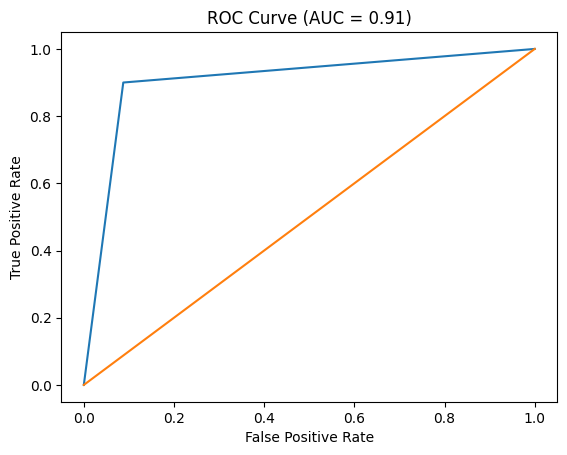

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])   # random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {auc:.2f})")
plt.show()